In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
sns.set()

In [2]:
extracted_data = pd.read_excel('MA_data.xlsx')

In [3]:
extracted_data

,line,author,title,year,design,recruit,procedure,indication,population,atm,...,brip1,cdh1,chek2,nbn,palb2,pten,stk11,tp53,rad51c,rad51d
0,1,The Cancer Genome Atlas Network,Comprehensive molecular portraits of human bre...,2012,not stated,not stated,whole exome sequencing,breast cancer,507,9,...,3,0,2,4,0,1,0,2,1,0
1,2,Tung et al,Frequency of Germline Mutations in 25 Cancer S...,2016,Prospective,2010-2012,NGS + Sanger for confirmation,breast cancer,488,5,...,4,0,10,1,1,1,0,0,1,1


In [4]:
mutations_atm = extracted_data.atm.values.astype(int)
mutations_bard1 = extracted_data.bard1.values.astype(int)
mutations_brca1 = extracted_data.brca1.values.astype(int)
mutations_brca2 = extracted_data.brca2.values.astype(int)
mutations_brip1 = extracted_data.brip1.values.astype(int)
mutations_cdh1 = extracted_data.cdh1.values.astype(int)
mutations_chek2 = extracted_data.chek2.values.astype(int)
mutations_nbn = extracted_data.nbn.values.astype(int)
mutations_palb2 = extracted_data.palb2.values.astype(int)
mutations_pten = extracted_data.pten.values.astype(int)
mutations_stk11 = extracted_data.stk11.values.astype(int)
mutations_tp53 = extracted_data.tp53.values.astype(int)
mutations_rad51c = extracted_data.rad51c.values.astype(int)
mutations_rad51d = extracted_data.rad51d.values.astype(int)

mutations_tp53

array([2, 0])

In [5]:
import theano.tensor as tt
invlogit = pm.math.invlogit

def RE_model(mutation_count):
    
    with pm.Model() as model:

        i = extracted_data.shape[0]
        mutation_count = mutation_count
        n = extracted_data.population.values.astype(int)

        # Study random effect
        mu_gamma = pm.Normal('mu_gamma', 0, sd = 100000)
        sigma_gamma = pm.Uniform('sigma_gamma', 0, 10)
        gamma = pm.Normal('gamma', mu = mu_gamma, sd = sigma_gamma)
      
        # Study-specific probabilities
        p_i = pm.Deterministic('p', invlogit(gamma))

        obs = pm.Binomial('obs', n=n, p= p_i, observed=mutation_count)
        
    return model

Gene: ATM

In [6]:
atm = RE_model(mutations_atm)

In [7]:
with atm:
    atm_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -18.524: 100%|███████| 200000/200000 [00:14<00:00, 14074.60it/s]
Finished [100%]: Average ELBO = -18.971
100%|███████████████████████████████████| 10000/10000 [00:18<00:00, 537.95it/s]


In [8]:
atm_burned_trace = atm_trace[5000:]

In [14]:
pm.summary(atm_burned_trace, varnames = ['p'])
#pm.plot_posterior(atm_burned_trace)


p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.014            0.004            0.000            [0.007, 0.022]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.008          0.011          0.014          0.016          0.022



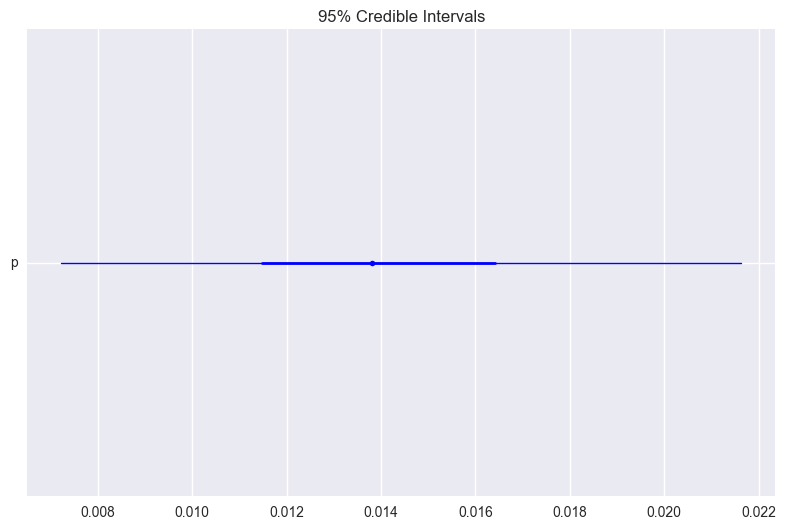

In [10]:
pm.forestplot(atm_burned_trace, varnames=['p'])

In [ ]:
p_atm = atm_burned_trace.p

In [ ]:
np.save('posterior_atm', p_atm)

Gene: BARD1

In [ ]:
bard1 = RE_model(mutations_bard1)

In [ ]:
with bard1:
    bard1_trace = pm.sample(10000)

In [ ]:
bard1_burned_trace = bard1_trace[5000:]

In [ ]:
#pm.summary(bard1_burned_trace, varnames=['p'])

In [ ]:
#pm.forestplot(bard1_burned_trace, varnames = ['p'])

In [ ]:
p_bard1 = bard1_burned_trace.p

In [ ]:
np.save('posterior_bard1', p_bard1)

Gene: BRCA 1

In [ ]:
brca1 = RE_model(mutations_brca1)

In [ ]:
with brca1:
    brca1_trace = pm.sample(10000)

In [ ]:
brca1_burned_trace = brca1_trace[5000:]

In [ ]:

# pm.summary(brca1_burned_trace, varnames=['p'])

In [ ]:
# pm.forestplot(brca1_burned_trace, varnames = ['p'])

In [ ]:
p_brca1 = brca1_burned_trace.p

In [ ]:

np.save('posterior_brca1', p_brca1)

Gene: BRCA 2

In [ ]:
brca2 = RE_model(mutations_brca2)

In [ ]:
with brca2:
    brca2_trace = pm.sample(10000)

In [ ]:
brca2_burned_trace = brca2_trace[5000:]

In [ ]:

#pm.summary(brca2_burned_trace, varnames= ['p'])

In [ ]:
#pm.forestplot

In [ ]:
#pm.plot_posterior(brca1_burned_trace, varnames=['p'])

In [ ]:
p_brca2 = brca2_burned_trace.p

In [ ]:

np.save('posterior_brca2', p_brca2)

Gene: BRIP1

In [ ]:
brip1 = RE_model(mutations_brip1)

In [ ]:
with brip1:
    brip1_trace = pm.sample(10000)

In [ ]:
brip1_burned_trace = brip1_trace[5000:]

In [ ]:
#pm.plot_posterior(brip1_burned_trace, varnames= ['p'])

In [ ]:
p_brip1 = brip1_burned_trace.p

In [ ]:
np.save('posterior_brip1', p_brip1)

Gene: CDH1 (obs: 0 observasjoner, så det vil ta lang tid, vent)

In [62]:
cdh1 = RE_model(mutations_cdh1)
with cdh1:
    cdh1_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -15.045: 100%|███████| 200000/200000 [00:12<00:00, 15595.76it/s]
Finished [100%]: Average ELBO = -13.739
100%|██████████████████████████████████| 10000/10000 [5:44:38<00:00,  2.07s/it]


In [64]:
cdh1_burned_trace = cdh1_trace[5000:]

In [66]:
p_cdh1 = cdh1_burned_trace.p

In [67]:
np.save('posterior_cdh1', p_cdh1)

In [63]:
stk11 = RE_model(mutations_stk11)
with stk11:
    stk11_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -13.771: 100%|███████| 200000/200000 [00:12<00:00, 15520.72it/s]
Finished [100%]: Average ELBO = -13.665
100%|█████████████████████████████████| 10000/10000 [65:42:43<00:00, 23.66s/it]


In [69]:
stk11_burned_trace = stk11_trace[5000:]

In [71]:
p_stk11 = stk11_burned_trace.p

In [73]:
np.save('posterior_stk11', p_stk11)

Gene: CHEK2

In [ ]:
chek2 = RE_model(mutations_chek2)

In [ ]:
with chek2:
    chek2_trace = pm.sample(10000)

In [ ]:
chek2_burned_trace = chek2_trace[5000:]

In [ ]:
#pm.plot_posterior(chek2_burned_trace)

In [ ]:
p_chek2 = chek2_burned_trace.p

In [ ]:
np.save('posterior_chek2', p_chek2)

Gene: NBN

In [ ]:
nbn = RE_model(mutations_nbn)

In [ ]:
with nbn:
    nbn_trace = pm.sample(10000)

In [ ]:
nbn_burned_trace = nbn_trace[5000:]

In [ ]:
# pm.plot_posterior(nbn_burned_trace, varnames= ['p'])

In [ ]:
p_nbn = nbn_burned_trace.p

In [ ]:
np.save('posterior_nbn', p_nbn)

Gene: PALB2

In [49]:
palb2 = RE_model(mutations_palb2)

In [50]:
with palb2:
    palb2_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -14.967: 100%|███████| 200000/200000 [00:12<00:00, 15577.54it/s]
Finished [100%]: Average ELBO = -15.2
100%|███████████████████████████████████| 10000/10000 [00:17<00:00, 577.00it/s]


In [51]:
palb2_burned_trace = palb2_trace[5000:]

In [53]:
#pm.plot_posterior(palb2_burned_trace, varnames= ['p'])

In [54]:
p_palb2 = palb2_burned_trace.p

In [55]:
np.save('posterior_palb2', p_palb2)

Gene: PTEN

In [6]:
pten = RE_model(mutations_pten)

In [7]:
with pten:
    pten_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -15.177: 100%|███████| 200000/200000 [00:12<00:00, 15482.27it/s]
Finished [100%]: Average ELBO = -15.681
100%|███████████████████████████████████| 10000/10000 [00:17<00:00, 563.29it/s]


In [8]:
pten_burned_trace = pten_trace[5000:]

In [10]:
# pm.plot_posterior(pten_burned_trace, varnames = 'p')

In [11]:
p_pten = pten_burned_trace.p

In [13]:
np.save('posterior_pten', p_pten)

Gene: RAD51C

In [31]:
rad51c = RE_model(mutations_rad51c)

In [32]:
with rad51c:
    rad15c_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -15.431: 100%|███████| 200000/200000 [00:13<00:00, 14918.69it/s]
Finished [100%]: Average ELBO = -15.951
100%|███████████████████████████████████| 10000/10000 [00:17<00:00, 564.27it/s]


In [33]:
rad51c_burned_trace = rad15c_trace[5000:]

In [35]:
# pm.plot_posterior(rad51c_burned_trace, varnames= ['p'])

In [36]:
p_rad51c = rad51c_burned_trace.p

In [37]:
np.save('posterior_rad51c', p_rad51c)

In [40]:
rad51d = RE_model(mutations_rad51d)

In [41]:
with rad51d:
    rad51d_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -14.908: 100%|███████| 200000/200000 [00:12<00:00, 15465.51it/s]
Finished [100%]: Average ELBO = -14.91
100%|███████████████████████████████████| 10000/10000 [00:18<00:00, 547.44it/s]


In [42]:
rad51d_burned_trace = rad51d_trace[5000:]

In [44]:
# pm.plot_posterior(rad51d_burned_trace, varnames= ['p'])

In [45]:
p_rad51d = rad51d_burned_trace.p

In [46]:
np.save('posterior_rad51d', p_rad51d)

Gene: STK11

Gene: TP53

In [58]:
tp53 = RE_model(mutations_tp53)

In [59]:
with tp53:
    tp53_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -16.819: 100%|███████| 200000/200000 [00:13<00:00, 14803.85it/s]
Finished [100%]: Average ELBO = -17.197
100%|███████████████████████████████████| 10000/10000 [00:18<00:00, 548.82it/s]


In [60]:
tp53_burned_trace = tp53_trace[5000:]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000136D2710>], dtype=object)

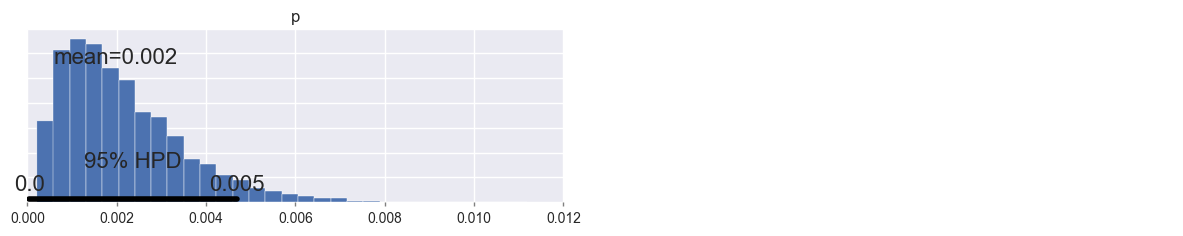

In [61]:
pm.plot_posterior(tp53_burned_trace, varnames= ['p'])